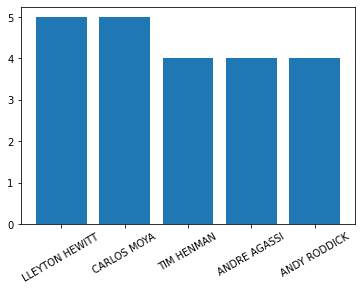

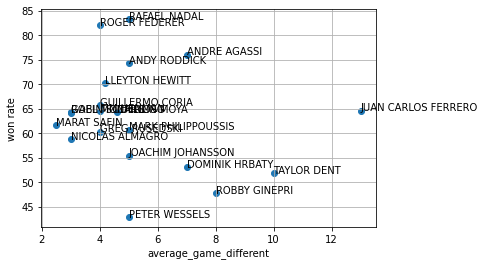

In [18]:
#import all the libraries
import re
import csv
import json
import requests
import unicodedata
%matplotlib inline
import pandas as pd
from numpy import arange
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib.pyplot as plts
from urllib.parse import urljoin
from IPython.core.display import display, HTML



#######################task 1###############################

#Specify the initial page to crawl
page_limit = 1000
base_url = 'http://comp20008-jh.eng.unimelb.edu.au:9889/main/'
seed_item = ''

seed_url = base_url + seed_item
page = requests.get(seed_url)
soup = BeautifulSoup(page.text, 'html.parser')

visited = {}; 
visited[seed_url] = True
pages_visited = 1

heads = soup.find_all('h1')
# oepn the json file
f = open('task1.csv', 'w')
f.write(seed_url)
for head in heads:
    f.write(','+str(head.text.strip()))
f.write('\n')

#Remove index.html
links = soup.findAll('a')
seed_link = soup.findAll('a', href=re.compile("^index.html"))
#to_visit_relative = list(set(links) - set(seed_link))
to_visit_relative = [l for l in links if l not in seed_link]


# Resolve to absolute urls
booktitle = []
to_visit = []
for link in to_visit_relative:
    to_visit.append(urljoin(seed_url, link['href']))

    
#Find all outbound links on succsesor pages and explore each one 
while (to_visit):
    # Impose a limit to avoid breaking the site 
    if pages_visited == page_limit :
        break
        
    # consume the list of urls
    link = to_visit.pop(0)
    heads = soup.find_all('h1')

    # need to concat with base_url, an example item <a href="catalogue/sharp-objects_997/index.html">
    page = requests.get(link)
    
    # scarping code goes here
    soup = BeautifulSoup(page.text, 'html.parser')
    f.write(link)
    heads = soup.find_all('h1')
    for head in heads:
        f.write(','+str(head.text.strip()))
    f.write('\n')


    # mark the item as visited, i.e., add to visited list, remove from to_visit
    visited[link] = True
    new_links = soup.findAll('a')
    for new_link in new_links :
        new_item = new_link['href']
        new_url = urljoin(link, new_item)
        if new_url not in visited and new_url not in to_visit:
            to_visit.append(new_url)
        
    pages_visited = pages_visited + 1
f.close()

######################## task2 #########################
with open('tennis.json') as f:
    Data = json.load(f)
    names = [datum['name'] for datum in Data]

#Specify the initial page to crawl
base_url = 'http://comp20008-jh.eng.unimelb.edu.au:9889/main/'
seed_items = ''
patten = r'(\(?.?\d(-|/)\d\)?.?){2,}'

#the first page
seed_url = base_url + seed_items
page = requests.get(seed_url)
soup = BeautifulSoup(page.text, 'html.parser')
output = open("task2.csv","w")
output.write("player,url,score,title\n")
#if find the first page, set up the visiting condition
visited = {}; 
visited[seed_url] = True
pages_visited = 1

#parse the first page
body= soup.find('body')
content = str(body.text.strip())
content_length = len(content)
for name in names:
    break_flag = 0
    name_length = len(name)
    for x in range(content_length-name_length-1):
        if name.lower() == content[x:x+name_length].lower():
            break_flag = 1
            break;
    if(break_flag):
        break           
links = soup.findAll('a')
seed_link = soup.findAll('a', href=re.compile("^index.html"))

#to_visit_relative = list(set(links) - set(seed_link))
to_visit_relative = [l for l in links if l not in seed_link]
def isvalid(score):
    score = score.replace("/","-").replace("(","").replace(")","")
    each_rounds = score.split(" ")
    each_rounds.remove("")
    for each_round in each_rounds:
        each_round = each_round.split("-")
        scorea = int(each_round[0])
        scoreb = int(each_round[1])
        if(scorea < 6 and scoreb < 6):
            return False
        if((scorea == 0 or scoreb == 0)and(scorea > 7 or scoreb>7 )):
            return False
    return True
        
# Resolve to absolute urls
booktitle = []
to_visit = []
for link in to_visit_relative:
    to_visit.append(urljoin(seed_url, link['href']))
    
#Find all outbound links on succsesor pages and explore each one 
while (to_visit):
    # Impose a limit to avoid breaking the site 
    if pages_visited == page_limit :
        break
        
    # consume the list of urls
    link = to_visit.pop(0)

    # need to concat with base_url, an example item <a href="catalogue/sharp-objects_997/index.html">
    page = requests.get(link)
    
    # scarping code goes here
    soup = BeautifulSoup(page.text, 'html.parser')
    body= soup.find('body')
    content = str(body.text.strip())
    content_length = len(content)
    
    #find the name and the score of that player
    break_flag = 0
    for x in range(content_length):
        for name in names:
            name_length = len(name)
            if((name_length + x) > content_length):
                break;
            if name.lower() == content[x:x+name_length].lower():
                score = re.search(patten,content[x:])
                if score:
                    score = score.group(0)
                    purified_score = ""
                    for element in score.split(" "):
                        if element != '':
                            element = element.replace(".","").replace(",","")
                            purified_score = purified_score + element + " "
                    if isvalid(purified_score):
                        output.write(name + ","+link+","+purified_score+",")
                        heads = soup.find_all('h1')
                        
                        #write into a file
                        for head in heads:
                            output.write("\""+str(head.text.strip())+"\"")
                        output.write("\n")                        
                    purified_score = ""
                    break_flag = 1
                    break;
        if(break_flag):
            break    

    # mark the item as visited, i.e., add to visited list, remove from to_visit
    visited[link] = True
    new_links = soup.findAll('a')
    for new_link in new_links :
        new_item = new_link['href']
        new_url = urljoin(link, new_item)
        if new_url not in visited and new_url not in to_visit:
            to_visit.append(new_url)
        
    pages_visited = pages_visited + 1
output.close()

#####################  task3 ########################

#initial dictionaries
player_score = {}
times = {}
with open('task2.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    
    #put strip the scores from task 2
    for row in reader:
        player = row['player']
        score = row['score'].replace("/","-").split(" ")
        score.remove("")
        accumulated_score = 0
        for element in score:
            if element[0] != "(":
                temp = element.replace("/","-").split("-")
                accumulated_score = int(temp[0])-int(temp[1]) + accumulated_score
        
        #put into dictionaries        
        if player not in player_score:
            player_score[player] = accumulated_score
            times[player] = 1
        else:
            player_score[player] = player_score[player] + accumulated_score
            times[player] = times[player]+1

#write into afile
f = open("task3.csv","w")
f.write("player,average_score\n")
for key in times.keys():
    f.write(key+","+str(player_score[key]/times[key])+"\n")
f.close()

######################## task4 #############################

athlete = pd.read_csv('task2.csv',encoding = 'ISO-8859-1')

#find the most 5 popular athlete
athlete = athlete.drop_duplicates(subset='title', keep='first', inplace=False)
result = athlete.player.value_counts().head(5)
top5_dict = result.to_dict()
names = [key for key in top5_dict.keys()]
time = [time for time in top5_dict.values()]

#plot the graph
plt.bar(arange(len(time)),time)
plt.xticks(arange(len(names)),names,rotation=30)
plt.savefig('task4.png')
plt.show()
plt.clf()

###################### task5 #############################

#read the csv
with open('tennis.json') as f:
    Data = json.load(f)
athlete = pd.read_csv('task3.csv',encoding = 'ISO-8859-1',index_col="player")
datadic = {}

# set up the data frame
for data in Data:
    if data['name'] not in datadic.keys():
        datadic[data['name']] = data['wonPct']
datafra1 = pd.Series(datadic)
templeframe = pd.DataFrame({'chance':datafra1})
templeframe.index.name = 'player'
frames = [athlete,templeframe]

#join to data frames
frames = pd.concat(frames, axis=1, join='inner')
names = [name for name in frames.index.array]
y = [float(y.strip("%")) for y in frames.chance.array]
x = [x for x in frames.average_score.array]

#plot graphs
plt.scatter(x,y)
plt.ylabel("won rate")
plt.xlabel("average_game_different")
for i in range(len(x)):
    plt.annotate(names[i],(x[i],y[i]))
plt.grid(True)
plt.savefig('task5.png')


